# Sentiment Classification on SST Dataset with Precision, Recall and F1 Score Evaluation Meric

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd 'gdrive/MyDrive/TSAI_END2/Session7/Assignment1'

/content/gdrive/MyDrive/TSAI_END2/Session7/Assignment1


In [ ]:
from nlp_classification_api import *

In [ ]:
%cd '../../../../../'

/content


In [ ]:
import torch
import spacy
import numpy as np

import random
import math
import time

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
# !pip install spacy --upgrade

## Building SST Dataset and Model

In [ ]:
model_params = {'embedding_dim': 100, 'hidden_dim1': 256, 'hidden_dim2': 128, 'n_layers': 2, 'bidirectional': True, 'dropout': 0.2}
params = {'data_path': 'gdrive/MyDrive/TSAI_END2/Session5/stanfordSentimentTreebank', 'data_name': 'sst', 'model_name': 'basic classification model', 'model_params': model_params, 'seed': SEED, 'batch_size': 128, 'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')}

nlp_pipeline = NLPClassificationPipeline(**params)

Loading data...


.vector_cache/glove.6B.zip: 0.00B [00:00, ?B/s]

Number of training examples: 7900
Number of testing examples: 3386


.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 398103/400000 [00:14<00:00, 27067.96it/s]

Unique tokens in source vocabulary: 16388
Unique tokens in target vocabulary: 5
Data is loaded


Loading model...
Model Loaded...
Model Structure:- 
NLPBasicClassifier(
  (embedding): Embedding(16388, 100, padding_idx=1)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (act): Softmax(dim=None)
)
The model has 4,015,253 trainable parameters
Model Built


## Training Model

In [ ]:
EPOCHS = 10

train_losses, train_accs, valid_losses, valid_accs, other_metrics = nlp_pipeline.train_model(EPOCHS, 'gdrive/MyDrive/TSAI_END2/Session9','sst_model1','prec_recall_f1')

Epoch: 01 | Epoch Time: 0m 1s
	 Train Loss: 1.533 | Train Acc: 29.72%
	 Val. Loss: 1.472 
	 Val Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.2919937074184418 | 0.42320817708969116 | 0.17278215747880085
	 negative | 0.3950299918651581 | 0.5065934062004089 | 0.22195474247856348
	 neutral | nan | 0.0 | nan
	 very positive | 0.37037035822868347 | 0.6410256624221802 | 0.2347417820294538
	 very negative | nan | 0.0 | nan
	 Micro Average F1 Score: 0.17468989958653278
	 Macro Average F1 Score: nan
	 Weighted Average F1 Score: nan


100%|█████████▉| 398103/400000 [00:30<00:00, 27067.96it/s]

Epoch: 02 | Epoch Time: 0m 1s
	 Train Loss: 1.377 | Train Acc: 38.91%
	 Val. Loss: 1.344 
	 Val Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.389983594417572 | 0.5403867959976196 | 0.22651407143868818
	 negative | 0.3928157687187195 | 0.7450549602508545 | 0.25720789672977007
	 neutral | 0.0 | 0.0 | 0.0
	 very positive | 0.5620437860488892 | 0.42307692766189575 | 0.24137931007187657
	 very negative | 0.46666666865348816 | 0.03146067261695862 | 0.02947368286653238
	 Micro Average F1 Score: 0.20643827525103367
	 Macro Average F1 Score: 0.15091499222137345
	 Weighted Average F1 Score: 0.17072473331173926
Epoch: 03 | Epoch Time: 0m 1s
	 Train Loss: 1.237 | Train Acc: 44.73%
	 Val. Loss: 1.327 
	 Val Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.43396225571632385 | 0.5233219861984253 | 0.2372356920264024
	 negative | 0.3843843936920166 | 0.8439560532569885 | 0.264099042443534
	 neutral | 0.4583333432674408 | 0.0181518159806728

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

## Visualization

	 Evaluation Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.42424243688583374 | 0.46188852190971375 | 0.2211329038440513
	 negative | 0.4443168640136719 | 0.42527472972869873 | 0.2172936532701793
	 neutral | 0.23724792897701263 | 0.33003300428390503 | 0.13802622681204152
	 very positive | 0.5478723645210266 | 0.37728938460350037 | 0.22342733845947194
	 very negative | 0.37168142199516296 | 0.28314605355262756 | 0.1607142823821212
	 Micro Average F1 Score: 0.19565859421145895
	 Macro Average F1 Score: 0.19211888095357305
	 Weighted Average F1 Score: 0.1976568584943287
Confusion Matrix:-


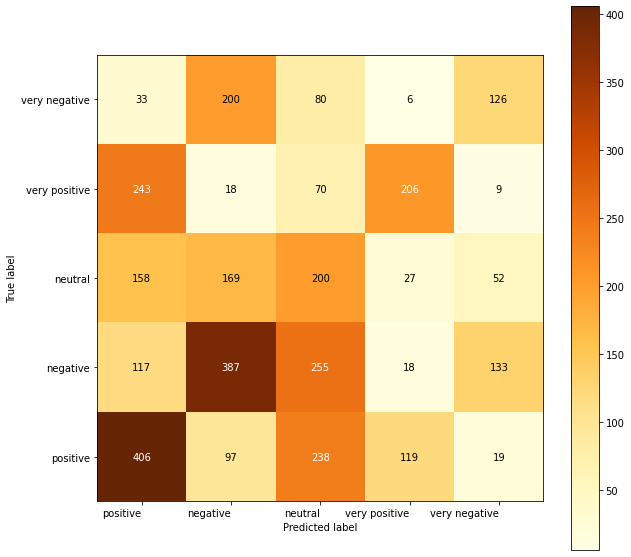

In [ ]:
nlp_pipeline.evaluate_model(eval_metric = 'prec_recall_f1')

## Visualization

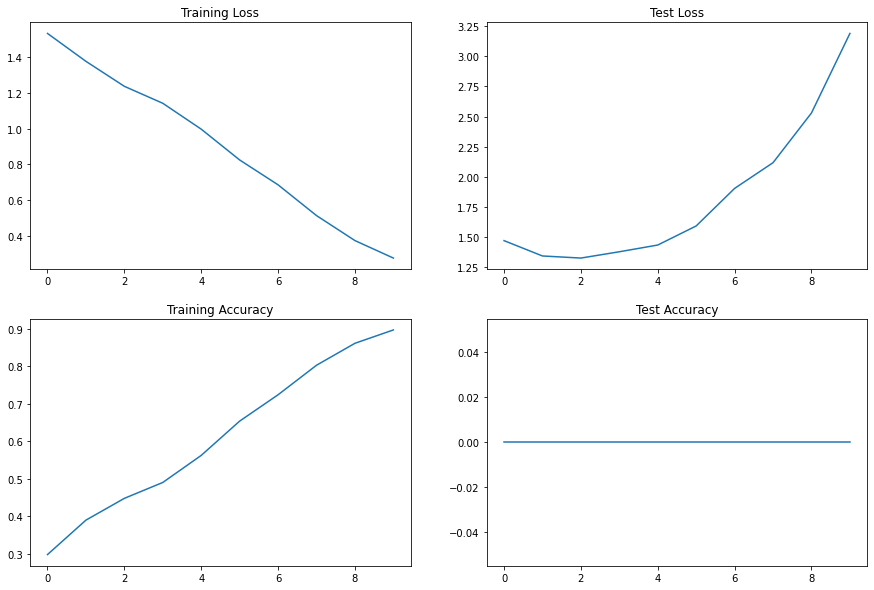

In [ ]:
nlp_classification_pipeline.visualize_graph(train_losses, train_accs, valid_losses, valid_accs)

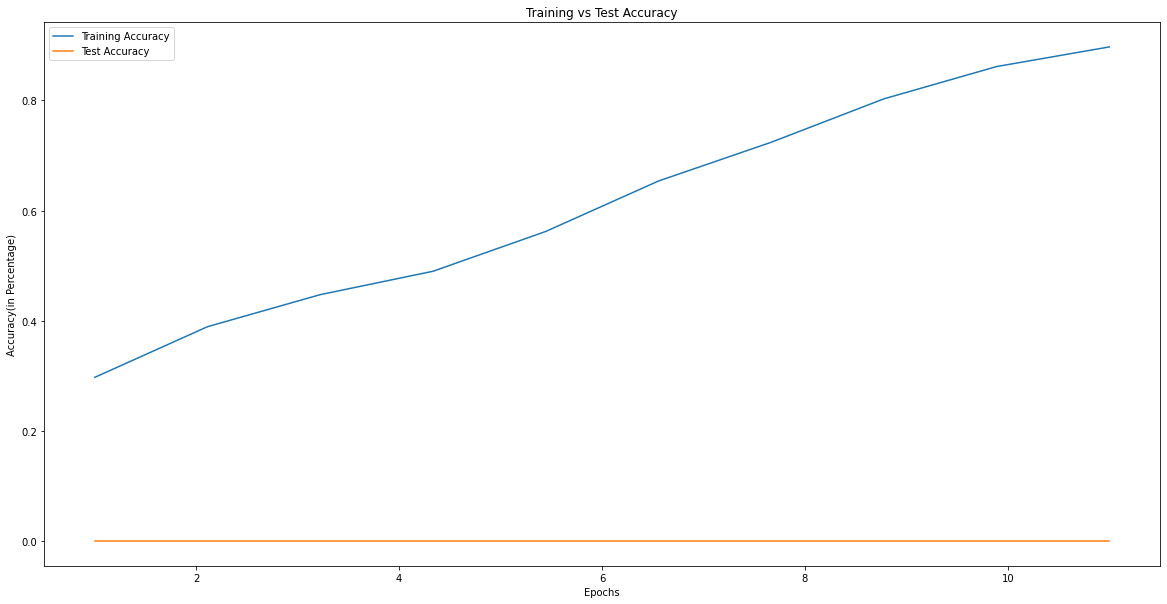

In [ ]:
dict_list = {'Training Accuracy': train_accs, 'Test Accuracy': valid_accs}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"
EPOCHS = 10

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

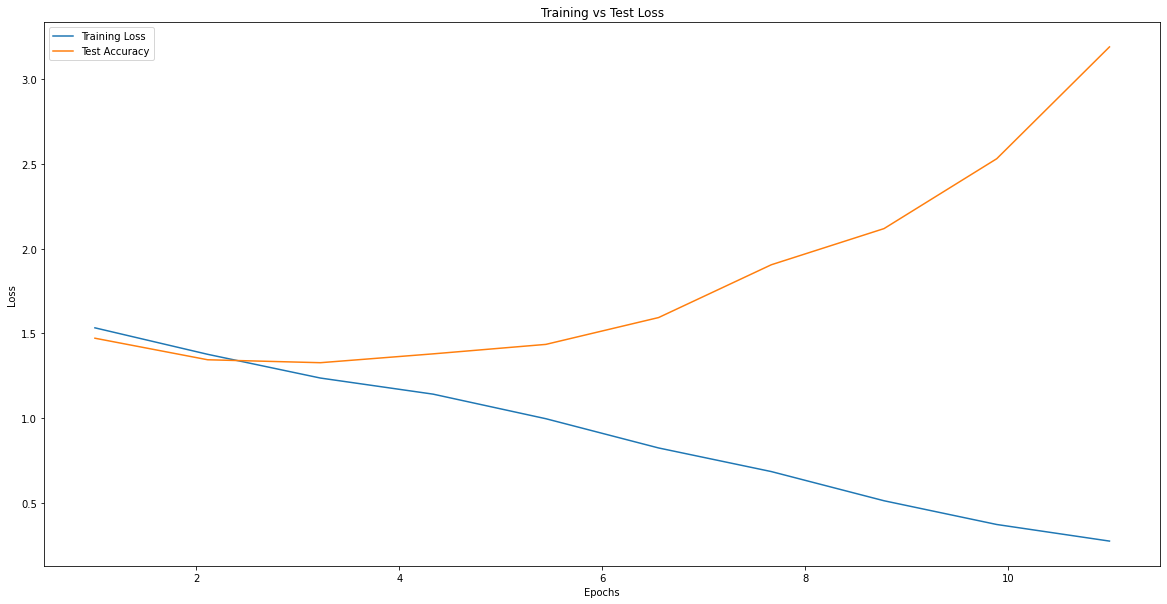

In [ ]:
dict_list = {'Training Loss': train_losses, 'Test Accuracy': valid_losses}
title = "Training vs Test Loss"
xlabel = "Epochs"
ylabel = "Loss"
name = "train_vs_test_loss_comparison_graph"

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

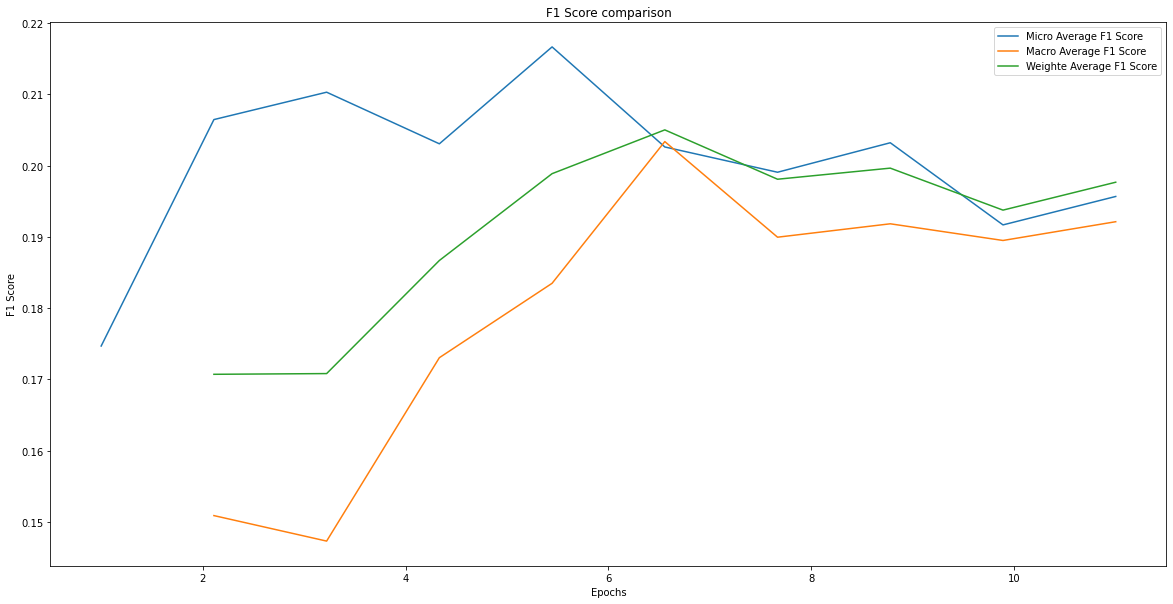

In [ ]:
[micro_avg_f1s, macro_f1s, wgt_f1s] = other_metrics
dict_list = {'Micro Average F1 Score': micro_avg_f1s, 'Macro Average F1 Score': macro_f1s, 'Weighte Average F1 Score':wgt_f1s}
title = "F1 Score comparison"
xlabel = "Epochs"
ylabel = "F1 Score"
name = "f1_comparison_graph"
EPOCHS = 10

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

## Predictions

In [ ]:
nlp_pipeline.get_classified_test_data()

****************************************
***** Correctly Classified Text: *******
****************************************
1) Text: The story gives ample opportunity for large - scale action and suspense , which director Shekhar Kapur  with tremendous skill .
   Target Sentiment: very positive
   Predicted Sentiment: very positive

2) Text: Abandon spends 90 minutes trying figure out whether or not some  pseudo - intellectual kid has intentionally left college or was killed .
   Target Sentiment: negative
   Predicted Sentiment: negative

3) Text: The most compelling Wiseman epic of recent years .
   Target Sentiment: very positive
   Predicted Sentiment: very positive

4) Text: You wonder why Enough was n't just a music video rather than a full - length movie .
   Target Sentiment: negative
   Predicted Sentiment: negative

5) Text: Offers an interesting look at the rapidly changing face of Beijing . 
   Target Sentiment: positive
   Predicted Sentiment: positive

6) Text: Well cast a

In [ ]:
nlp_pipeline.get_classified_test_data(correct=False)

****************************************
***** Incorrectly Classified Text: *******
****************************************
1) Text: Writer - director 's Mehta 's effort has  of charm and the whimsy is in the mixture , the intoxicating masala , of cultures and film genres . 
   Target Sentiment: very positive
   Predicted Sentiment: positive

2) Text: A gimmick in search of a movie : how to get Carvey into as many silly costumes and deliver as many silly voices as possible , plot mechanics be damned .  
   Target Sentiment: negative
   Predicted Sentiment: neutral

3) Text: White Oleander may leave you rolling your eyes in the dark , but that does n't mean you wo n't like looking at it . 
   Target Sentiment: positive
   Predicted Sentiment: negative

4) Text: This is not Chabrol 's best , but even his lesser works outshine the best some directors can offer .
   Target Sentiment: neutral
   Predicted Sentiment: very positive

5) Text: Romanek 's themes are every bit as distinctive as 